In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
import time

# Load Data

In [6]:
train = pd.read_csv('/content/drive/MyDrive/Classroom/Generative Generation/A2_Bayesian_Inference/MNIST_train.csv')
train = train.iloc[:,2:]
train

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test = pd.read_csv('/content/drive/MyDrive/Classroom/Generative Generation/A2_Bayesian_Inference/MNIST_test.csv')
test = test.iloc[:,2:]
test

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train = train.iloc[:,1:].to_numpy()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
X_test = test.iloc[:,1:].to_numpy()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
y_train = train.iloc[:,0].to_numpy()
y_train

array([5, 0, 4, ..., 5, 6, 8])

In [11]:
y_test = test.iloc[:,0].to_numpy()
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [12]:
X_train.shape

(60000, 784)

In [13]:
y_train.shape

(60000,)

In [14]:
X_test.shape

(10000, 784)

In [15]:
y_test.shape

(10000,)

# Visualizations

In [ ]:
X_train[1,:].max()

255

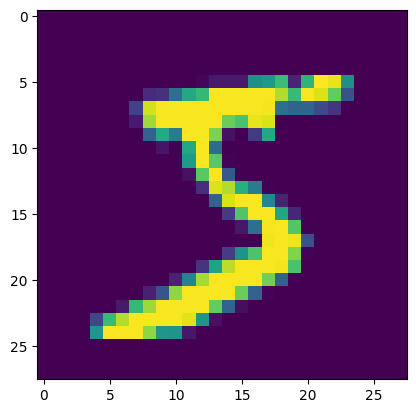

In [ ]:
plt.imshow(X_train[0,:].reshape(28,28))

## Normalizing Data

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Classifiers

## Naive Bayes Classifier

In [ ]:
class NaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Smoothing parameter
        self.class_probs = {}
        self.feature_probs = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)

        # Calculate class probabilities
        for c in self.classes:
            self.class_probs[c] = np.sum(y == c) / n_samples

        # Calculate feature probabilities for each class
        for c in self.classes:
            self.feature_probs[c] = {}
            X_c = X[y == c]
            for feature in range(n_features):
                feature_values = X_c[:, feature]
                unique_values, counts = np.unique(feature_values, return_counts=True)
                self.feature_probs[c][feature] = {
                    value: (count + self.alpha) / (len(X_c) + self.alpha * len(unique_values))
                    for value, count in zip(unique_values, counts)
                }

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        probabilities = {}
        for c in self.classes:
            prob = np.log(self.class_probs[c])
            for feature, value in enumerate(x):
                if value in self.feature_probs[c][feature]:
                    prob += np.log(self.feature_probs[c][feature][value])
                else:
                    prob += np.log(self.alpha / (sum(self.feature_probs[c][feature].values()) + self.alpha))
            probabilities[c] = prob
        return max(probabilities, key=probabilities.get)

In [ ]:
nb = NaiveBayes()

In [ ]:
nb.fit(X_train_scaled, y_train)

In [ ]:
# Calculate the start time
start = time.time()

# Code here
y_hat0 = nb.predict(X_test_scaled)

# Calculate the end time and time taken
end = time.time()
length = end - start

# Show the results : this can be altered however you like
print("It took", length, "seconds!")

It took 222.42197704315186 seconds!


In [4]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
accuracy(y_test,y_hat0)

0.2368

## Gaussian Naive Bayes

In [ ]:
class GaussNB():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k]
      # Naive Assumption: Observations are linearly independent of each other
      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0)+epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):

    N , D = X.shape
    P_hat = np.zeros((N,len(self.K)))

    for k , l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [ ]:
gnb = GaussNB()

In [ ]:
gnb.fit(X_train_scaled,y_train,epsilon = 1e-2)

In [ ]:
# Calculate the start time
start = time.time()

# Code here
y_hat = gnb.predict(X_test)

# Calculate the end time and time taken
end = time.time()
length = end - start

# Show the results : this can be altered however you like
print("It took", length, "seconds!")

It took 7.945600509643555 seconds!


In [ ]:
y_hat

array([7, 2, 2, ..., 5, 8, 6])

In [ ]:
accuracy(y_test,y_hat)

0.6495

## Non-Naive Gauss-Bayes Classifier

In [ ]:
class GaussBayes():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k, :]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [ ]:
gaussbayes = GaussBayes()

In [ ]:
gaussbayes.fit(X_train_scaled, y_train, epsilon = 1e-1)

In [ ]:
# Calculate the start time
start = time.time()

# Code here
y_hat2 = gaussbayes.predict(X_test_scaled)

# Calculate the end time and time taken
end = time.time()
length = end - start

# Show the results : this can be altered however you like
print("It took", length, "seconds!")

It took 6.400845289230347 seconds!


In [ ]:
y_hat2

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
accuracy(y_test,y_hat2)

0.9542

## K-Nearest Neighbours Classifier

In [ ]:
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y

  def predict(self, X, K, epsilon = 1e-3):

    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [ ]:
knn = KNNClassifier()
knn.fit(X_train_scaled,y_train)

In [ ]:
len(X_test_scaled)

10000

In [ ]:
# Calculate the start time
start = time.time()

# Code here
y_hat3 = knn.predict(X_test_scaled, 20)

# Calculate the end time and time taken
end = time.time()
length = end - start

# Show the results : this can be altered however you like
print("It took", length, "seconds!")


It took 2215.0829544067383 seconds!


In [ ]:
print(y_hat3)
print(y_test)

[7. 2. 1. ... 4. 5. 6.]
[7 2 1 ... 4 5 6]


In [ ]:
accuracy(y_test,y_hat3)

0.9633

In [ ]:
# Calculate the start time
start = time.time()

# Code here
y_hat4 = knn.predict([X_test_scaled[1,:]], 20)

# Calculate the end time and time taken
end = time.time()
length = end - start

# Show the results : this can be altered however you like
print("It took", length, "seconds!")


It took 0.23182392120361328 seconds!


In [ ]:
print(y_hat4)
print(y_test[1])

[2.]
2


In [ ]:
# Calculate the start time
start = time.time()

# Code here
y_hat4 = knn.predict([X_test_scaled[100,:]], 20)

# Calculate the end time and time taken
end = time.time()
length = end - start

# Show the results : this can be altered however you like
print("It took", length, "seconds!")

print(y_hat4)
print(y_test[100])

It took 0.2651255130767822 seconds!
[6.]
6


In [ ]:
# Calculate the start time
start = time.time()

# Code here
y_hat4 = knn.predict([X_test_scaled[500,:]], 20)

# Calculate the end time and time taken
end = time.time()
length = end - start

# Show the results : this can be altered however you like
print("It took", length, "seconds!")

print(y_hat4)
print(y_test[500])

It took 0.24531865119934082 seconds!
[3.]
3


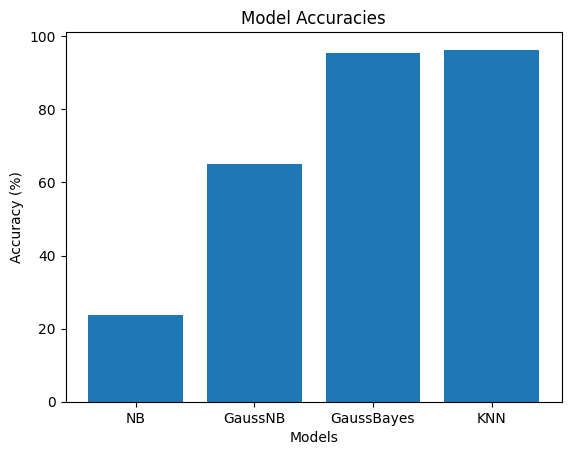

In [25]:
# Create data
Models = ['NB', 'GaussNB', 'GaussBayes', 'KNN']
values = [0.2368*100, 0.6495*100, 0.9542*100, 0.9633*100]

# Create bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracies')

# Show the plot
plt.show()

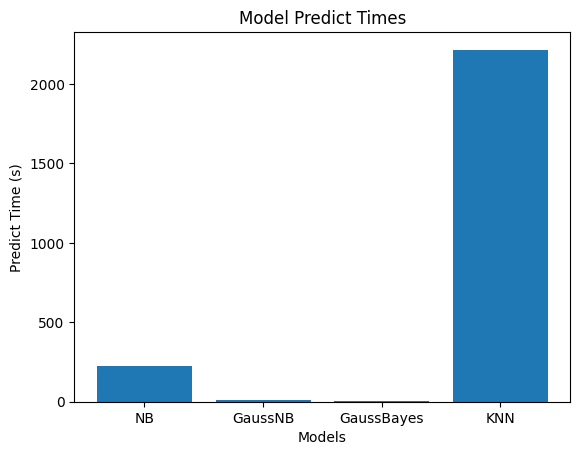

In [26]:
# Create data
Models = ['NB', 'GaussNB', 'GaussBayes', 'KNN']
values = [222.42197704315186, 7.945600509643555, 6.400845289230347, 2215.0829544067383]

# Create bar chart
plt.bar(categories, values)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Predict Time (s)')
plt.title('Model Predict Times')

# Show the plot
plt.show()